<a href="https://colab.research.google.com/github/FauzanNR/DataAnalysisDicoding/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#E-Comerce Public Data Analysis

- **Nama:** Fauzan Nur Rifai
- **Email:** fauzannur.rifai.fnr@gmail.com
- **ID Dicoding:** fauzannurrifai

#Business Question
- Wich region gave the most revenue?
- Are there specific times in all regions when customers make the most purchase ?
- What are the most purchased products?
- Which seller make the most selling?



#Importing Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


pd.set_option('display.width', None)       # Avoid truncation

#Data Wrangling

##Data Gathering

In [100]:
customers_df = pd.read_csv("Data/E-Commerce-Public-Dataset/customers_dataset.csv")
orders_df = pd.read_csv("Data/E-Commerce-Public-Dataset/orders_dataset.csv")
geolocation_df = pd.read_csv("Data/E-Commerce-Public-Dataset/geolocation_dataset.csv")
order_items_df = pd.read_csv("Data/E-Commerce-Public-Dataset/order_items_dataset.csv")
order_payments_df = pd.read_csv("Data/E-Commerce-Public-Dataset/order_payments_dataset.csv")
sellers_df = pd.read_csv("Data/E-Commerce-Public-Dataset/sellers_dataset.csv")
products_df = pd.read_csv("Data/E-Commerce-Public-Dataset/products_dataset.csv")
products_translation_df = pd.read_csv("Data/E-Commerce-Public-Dataset/product_category_name_translation.csv")

In [101]:
customers_df.name = "Customers"
orders_df.name = "Orders"
geolocation_df.name = "Geolocations"
order_items_df.name = "Order Items"
order_payments_df.name = "Order Payments"
sellers_df.name = "Sellers"
products_df.name = "Products"
products_translation_df.name = "Translated Product"
df_list = [ customers_df, orders_df, geolocation_df, order_items_df, order_payments_df, sellers_df, products_df, products_translation_df]

In [102]:
for data in df_list:
    print(f"###Data {data.name} Info###")
    data.info()

###Data Customers Info###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
###Data Orders Info###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_p

##Data Assesment

In [103]:
for data in df_list:
    print(f"###{data.name}###")
    print("---Missing Data---")
    print(data.isna().sum())

    print("---Duplicated Data---")
    print(data.duplicated().sum())

    print("---Data Desc---")
    print(data.describe())

###Customers###
---Missing Data---
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
---Duplicated Data---
0
---Data Desc---
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
###Orders###
---Missing Data---
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
---Duplicated Data---
0
---Data Desc---
                                order_id                       customer_id  \
count  

##Data Cleaning

In [104]:
#Duplicated Data

for data in df_list:
    print(f"###{data.name}###")
    print(data.duplicated().sum())
    data.drop_duplicates(inplace=True)
    print(data.duplicated().sum())

###Customers###
0
0
###Orders###
0
0
###Geolocations###
261831
0
###Order Items###
0
0
###Order Payments###
0
0
###Sellers###
0
0
###Products###
0
0
###Translated Product###
0
0


In [9]:
#Order missing value
# order_approved_at                 160
# order_delivered_carrier_date     1783
# order_delivered_customer_date    2965
orders_df.order_status.value_counts()


delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [105]:
#checking approved and delivered order but missing value
def order_approvement_missing():
    order_approved_null_status = orders_df[orders_df["order_approved_at"].isna() & orders_df["order_status"]]
    return order_approved_null_status.order_status.value_counts()

order_approvement_missing()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

In [106]:
#Convert to datetime
datetime_column = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_column:
    orders_df[column] = pd.to_datetime(orders_df[column], errors="coerce")

In [107]:
#get average approvement time
approved_notna = (orders_df["order_approved_at"].notna() &  orders_df["order_purchase_timestamp"].notna()
                  & (orders_df["order_status"] == "delivered")
                  )
order_approvement_delay = (orders_df.loc[approved_notna, "order_approved_at"] - orders_df.loc[approved_notna, "order_purchase_timestamp"])
avg_approvement = order_approvement_delay.mean()
print(avg_approvement)

0 days 10:16:36.361243572


In [109]:
orders_df.loc[order_approvement_delay.idxmax()]

order_id                         0a93b40850d3f4becf2f276666e01340
customer_id                      a70076d8d4bfce15f8081951c43bf187
order_status                                            delivered
order_purchase_timestamp                      2018-01-20 14:24:50
order_approved_at                             2018-02-20 11:51:27
order_delivered_carrier_date                  2018-02-21 19:34:13
order_delivered_customer_date                 2018-03-02 22:37:49
order_estimated_delivery_date                 2018-02-23 00:00:00
Name: 96251, dtype: object

In [110]:
delivered_missing_approvement = (((orders_df["order_status"] == "delivered") | (orders_df["order_status"] == "canceled") ) & (orders_df["order_approved_at"].isna()) & (orders_df["order_purchase_timestamp"]+avg_approvement < orders_df["order_delivered_carrier_date"]))

orders_df.loc[delivered_missing_approvement]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [ ]:
orders_df.loc[delivered_missing_approvement, "order_approved_at"] = (orders_df.loc[delivered_missing_approvement, "order_purchase_timestamp"]+avg_approvement).dt.floor("S")

In [112]:
orders_df.loc[delivered_missing_approvement]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-19 00:56:36,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-18 23:02:07,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-18 23:46:23,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-19 03:05:11,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-17 23:22:31,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-19 23:04:44,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 11:45:23,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-18 21:20:55,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-20 08:43:35,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-18 03:38:31,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [113]:
order_approvement_missing()

canceled    141
created       5
Name: order_status, dtype: int64

In [165]:
delivered_missing_carrier_customer = (orders_df["order_delivered_carrier_date"].isna() 
                                      & orders_df["order_delivered_customer_date"].isna() 
                                      & (orders_df["order_status"] == "delivered"))

orders_df.loc[delivered_missing_carrier_customer]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [134]:
#avg order_delivered_carrier_date

delivered_notna =orders_df[orders_df["order_delivered_carrier_date"].notna() & orders_df["order_delivered_customer_date"].notna()
                   & (orders_df["order_status"] == "delivered")]

order_delivered_carrier_date_delay = (delivered_notna["order_delivered_carrier_date"] - delivered_notna["order_approved_at"])

avg_order_delivered_carrier_date =order_delivered_carrier_date_delay.mean()
avg_order_delivered_carrier_date

Timedelta('2 days 19:10:56.833666773')

Assignin delivered order with missing approvement data

In [135]:
orders_df.loc[delivered_missing_carrier_customer, "order_delivered_carrier_date"] = (orders_df.loc[delivered_missing_carrier_customer, "order_approved_at"]+avg_order_delivered_carrier_date).dt.floor("S")

In [136]:
orders_df.loc[delivered_missing_carrier_customer]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-28 18:41:12,NaT,2017-06-23


In [183]:
carrier_to_estimated = (orders_df.loc[delivered_missing_carrier_customer, "order_estimated_delivery_date"] - orders_df.loc[delivered_missing_carrier_customer, "order_delivered_carrier_date"] )
median_date = carrier_to_estimated/2
orders_df.loc[delivered_missing_carrier_customer, "order_delivered_customer_date"] = (orders_df.loc[delivered_missing_carrier_customer, "order_delivered_carrier_date"]+median_date).dt.floor("S")

In [184]:
orders_df.loc[delivered_missing_carrier_customer]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


another more

In [169]:
notna_delivered =((orders_df["order_status"] == "delivered"))

orders_df.loc[notna_delivered].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     1
order_delivered_customer_date    7
order_estimated_delivery_date    0
dtype: int64

Delivered orders with missing order_delivered_customer_date

In [185]:
isna_order_delivered_customer_date =((orders_df["order_status"] == "delivered") 
                  & orders_df["order_delivered_customer_date"].isna())

orders_df.loc[isna_order_delivered_customer_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [196]:
orders_df.loc[isna_order_delivered_customer_date, "order_delivered_customer_date"] = (orders_df.loc[isna_order_delivered_customer_date, "order_delivered_carrier_date"]
                                                                                                     +((orders_df.loc[isna_order_delivered_customer_date, "order_estimated_delivery_date"] - orders_df.loc[isna_order_delivered_customer_date, "order_delivered_carrier_date"])/2)
                                                                                                     ).dt.floor("S")


In [197]:
orders_df.loc[isna_order_delivered_customer_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-09 09:06:11,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-05 16:02:30,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-16 18:58:30,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-16 18:58:30,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-13 16:44:00,2018-07-24
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-19 07:05:00,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-11 09:43:00,2018-07-19


Delivered orders with missing order_delivered_carrier_date

In [198]:
    

isna_order_delivered_carrier_date =((orders_df["order_status"] == "delivered") 
                  & orders_df["order_delivered_carrier_date"].isna()
)

orders_df.loc[isna_order_delivered_carrier_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14


In [199]:
orders_df.loc[isna_order_delivered_carrier_date, "order_delivered_carrier_date"] = (
    orders_df.loc[isna_order_delivered_carrier_date, "order_approved_at"]+avg_order_delivered_carrier_date
).dt.floor("S")

In [200]:
orders_df.loc[isna_order_delivered_carrier_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-10-02 04:18:12,2017-11-20 19:44:47,2017-11-14


In [201]:
notna_delivered =((orders_df["order_status"] == "delivered"))

orders_df.loc[notna_delivered].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Product missing data

In [235]:
products_df["product_category_name"].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [246]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [245]:
products_df["product_weight_g"].fillna(products_df["product_weight_g"].median(), inplace=True)
products_df["product_length_cm"].fillna(products_df["product_length_cm"].median(), inplace=True)
products_df["product_height_cm"].fillna(products_df["product_height_cm"].median(), inplace=True)
products_df["product_width_cm"].fillna(products_df["product_width_cm"].median(), inplace=True)


In [247]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [248]:
products_df["product_category_name"].fillna("unknown", inplace=True)

In [252]:
products_df["product_name_lenght"].fillna(products_df["product_name_lenght"].mean(), inplace=True)

In [ ]:
products_df["product_description_lenght"].fillna(products_df["product_description_lenght"].mean())

In [257]:
products_df["product_description_lenght"].describe(include="all")

count    32341.000000
mean       771.495285
std        635.115225
min          4.000000
25%        339.000000
50%        595.000000
75%        972.000000
max       3992.000000
Name: product_description_lenght, dtype: float64

<AxesSubplot:>

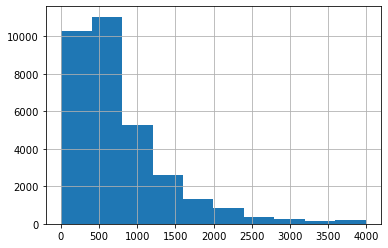

In [ ]:
products_df["product_description_lenght"].hist()

In [259]:
products_df.loc[products_df["product_description_lenght"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,unknown,48.476949,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,unknown,48.476949,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,unknown,48.476949,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,unknown,48.476949,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,unknown,48.476949,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,unknown,48.476949,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,unknown,48.476949,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,unknown,48.476949,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,unknown,48.476949,NaN,NaN,1300.0,45.0,16.0,45.0


In [253]:
products_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

checking product_id included in order_item

In [266]:
# Perform an inner join on the 'product_id' column
intersection_df = products_df.merge(order_items_df, on="product_id", how="inner")
intersection_df.describe(include="all")


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650,112650.000000,111047.000000,111047.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650,112650.000000,112650,112650,112650.000000,112650.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98666,NaN,3095,93318,NaN,NaN
top,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8272b63d03f5f79c56e9e4120aec44ef,NaN,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,527,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,2033,21,NaN,NaN
mean,NaN,NaN,48.771723,787.867029,2.209713,2093.449356,30.152845,16.593191,22.996067,NaN,1.197834,NaN,NaN,120.653739,19.990320
std,NaN,NaN,9.954056,652.135608,1.721438,3751.338501,16.152290,13.442486,11.706394,NaN,0.705124,NaN,NaN,183.633928,15.806405
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,1.000000,NaN,NaN,0.850000,0.000000
25%,NaN,NaN,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,1.000000,NaN,NaN,39.900000,13.080000
50%,NaN,NaN,51.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,1.000000,NaN,NaN,74.990000,16.260000
75%,NaN,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,1.000000,NaN,NaN,134.900000,21.150000
